In [4]:
import pandas as pd;
import numpy as np;
from matplotlib import pyplot as plt
from Linear_regression_tools import simple_regression_parameters;

In [5]:
adv_data = pd.read_csv("Data/Advertising.csv");

adv_data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [19]:
n = adv_data.shape[0];

## I. Creating a simple linear regression ##  

### 1. TV linear regression  

We can approximate the relationship between the X (TV) and Y (sales) by a linear function as following : 

<b>Y = β0 + β1.X + error.</b><br>
here,<br>
β0, β1 are considered reducible parameters, however "error" is not reducible.<br>
Where β0 is the intercept term, β1 is the slope.<br>


<b>estimating the parameters 

when dealing the simple version of linear regression, we can easily estimate our parameters using some Calculus<br>
<b>What is RSS: </b> <br>
RSS = $\sum_{i=1}^n$(y<sub>i</sub> − β̂ <sub>0</sub> − β̂ <sub>1</sub>.x<sub>i</sub>)^2.<br>
Where n here is our sample's size.<br>
From this formula we can intuitively derive all the parameters' expression by taking the partial derivatives with respect to  β̂ <sub>0</sub> and β̂ <sub>1</sub> and put it to zero (finding minima coordinates). <br>

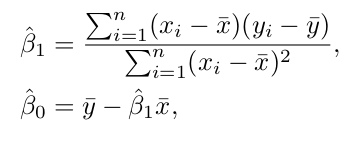

In [20]:
tv_data = np.array(adv_data['TV']);
tv_data_mean = tv_data.mean()
y_data = np.array(adv_data['sales']);
y_data_mean = y_data.mean()
# print(np.sum((tv_data - tv_data_mean)*(y_data - y_data_mean)));

beta_hat1,beta_hat0 = simple_regression_parameters(tv_data,y_data,tv_data_mean,y_data_mean);

rss = np.sum((y_data - (beta_hat0 + beta_hat1 * tv_data))**2);


<b>Assessing the accuracy of the estimates

Using hypothesis testing (T-statistic) <br>
H0 : there is no relationship between X and Y => beta_1 = 0<br>
Ha : Contrary to H0.<br>




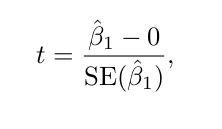

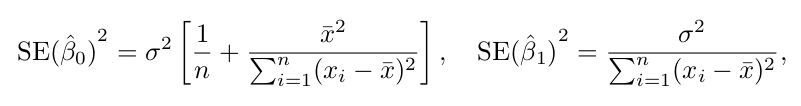 <br>
Here, sigma = var(error) = RSE .<br>
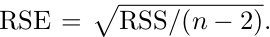

In [21]:
# calculating SE(Beta_1),t
rse = (rss/(n-2))**0.5;
se_beta1 = np.sqrt(rse**2 / np.sum((tv_data - tv_data_mean)**2));
se_beta0 = np.sqrt((rse**2)*( (1/n) + tv_data_mean**2/(np.sum((tv_data - tv_data_mean)**2))));
t_beta1 = beta_hat1 / se_beta1;
t_beta0 = beta_hat0 / se_beta0;


estimates_results = pd.DataFrame({'estimate': ['beta_0','beta_1'] , 'coefficients':[beta_hat0,beta_hat1] , 'T-statistic' : [t_beta0,t_beta1] , 'P-value' : ['<0.0001' ,'<0.0001']});
print(estimates_results);

  estimate  coefficients  T-statistic  P-value
0   beta_0      7.032594    15.360275  <0.0001
1   beta_1      0.047537    17.667626  <0.0001


from the t-distribution table we will find that p-value is approximately equal to 0 <br>
For 95% confidence interval, and n-2 DF => We reject H0 and accept Ha

<b>Assessing the accuracy of the model

So, we have proved that there is a relationship between sales and TV. Now we should assess our model using <b> the residual standard error (RSE)</b> or<b> R^2 statistic </b>.<br>
<b> R^2 statistic </b> : the proportion of variability of Y explained by our model.

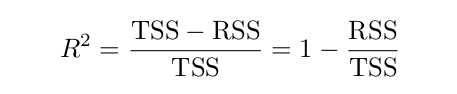 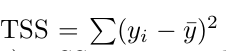

In [22]:
tss = np.sum((y_data - y_data_mean)**2);
R = np.sqrt((tss - rss) /tss );
print(tss);
print(R**2);
model_results = pd.DataFrame({'RSE': [rse] , 'R^2':[R**2]});
model_results

5417.14875
0.6118750508500711


,RSE,R^2
0,3.258656,0.611875


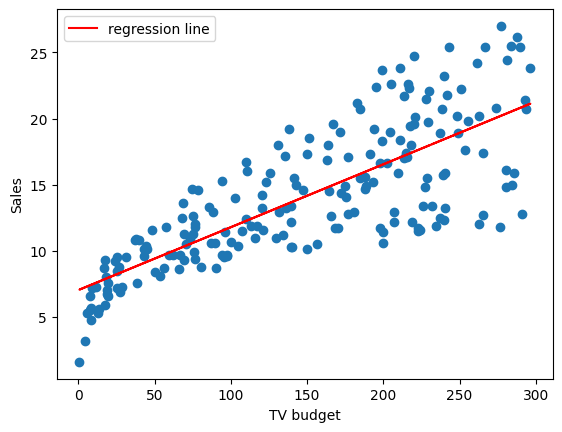

In [23]:
fig,ax = plt.subplots();
ax.scatter(x = adv_data['TV'] , y = adv_data['sales']);
ax.set_xlabel("TV budget")
ax.set_ylabel("Sales")
ax.plot( adv_data['TV'] ,adv_data['TV']*beta_hat1 + beta_hat0 , color = "red" , label = "regression line");
plt.legend();
plt.show()

### Multiple Linear regression

How to test if there is a relationship between the predictors and response
(https://online.stat.psu.edu/stat501/lesson/6/6.2)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# initializing the model 
multiRegression = LinearRegression();

# train_x,test_x,train_y,test_y = train_test_split(adv_data[['TV','radio','newspaper']],adv_data['sales'],shuffle=True,test_size=0.0,train_size=0.8);

multiRegression.fit(adv_data[['TV','radio','newspaper']],adv_data['sales']);

y_hat = multiRegression.predict(adv_data[['TV','radio','newspaper']]);

print(y_hat)



[20.52397441 12.33785482 12.30767078 17.59782951 13.18867186 12.47834763
 11.72975995 12.12295317  3.72734086 12.55084872  7.0322992  17.28512918
 10.57712073  8.82630048 18.43436638 20.81929952 12.82365674 23.22495716
  9.95168206 14.16607293 18.10076728 14.7405382   6.4891503  16.5459329
  8.14651887 15.6100386  14.98951429 17.05167344 19.41053803  9.14402389
 21.6339338  11.3460929   7.63888314 18.86426829  7.57483051 17.00682618
 23.40590052 15.62347779  9.90868103 20.44761039 16.37766467 17.2959832
 21.59580326 13.96385684  8.88787996 15.16152314  8.87338673 21.7226299
 16.26362018  8.1681656  12.63121132  9.33981296 20.66297563 19.94469957
 20.37443008 21.2926106   8.52771254 12.77458802 21.89805198 18.13348698
  5.74215558 22.89067208 16.78426073 13.21069202 16.97773556  7.84904532
  9.01603163 12.0370073  18.97657924 21.10891244 17.77949782 10.62693815
 10.36684881  9.90298206 17.32931197 11.85832174  4.47758904 13.81190223
  8.81331353  9.67530328 11.44592364 14.64794093 10.17

we have created and trained our model with 3 predictors (TV, newspaper, radio). <br>
Now, we will try to ensure that there is a relationship between at least one of our three predictors and the response (sales) with the help of F-test. <br>
setting our reduced, full models.<br>
H0 : reduced model, y = beta0 or μ for example .<br>
Ha : full model, y = x_0*beta_1+  x_1*beta_2 + x_2*beta_3 + beta_0. <br>
<br>
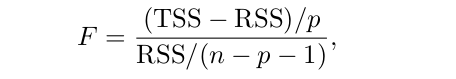 <br>

p : is the number of added variable in the full model.<br>
n : number of sample's observations. 


In [33]:
rss = np.sum(( adv_data['sales'] - (y_hat))**2);

F_statistic = ((tss - rss)/3) / (rss / (n - 3 - 1));

F_statistic

570.2707036590942